## Data Description


Source : https://www.kaggle.com/c/instacart-market-basket-analysis

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# instacart 데이터를 모두 불러옵니다.
base_path='/content/drive/MyDrive/instacart-market-basket-analysis/'

aisles=pd.read_csv(base_path+'aisles.csv') # 제품 매대 번호호
departments=pd.read_csv(base_path+'departments.csv')  # 제품 종류류
prior=pd.read_csv(base_path+'order_products__prior.csv') # 주문번호, 생산번호, 장바구니, 재주문문
train=pd.read_csv(base_path+'order_products__train.csv')
orders=pd.read_csv(base_path+'orders.csv')
products= pd.read_csv(base_path+'products.csv')

In [23]:
display(orders)
display(products)
display(departments)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [24]:
prior_sample = prior[:30000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
29995,3108,19468,12,1
29996,3108,30305,13,1
29997,3109,6184,1,1
29998,3109,10326,2,1


In [35]:
# 여러개의 데이터를 하나의 데이터로 합친다.

temp = pd.merge(orders,prior_sample,on='order_id' )
temp = pd.merge(temp, products, on ='product_id')
temp = pd.merge(temp, aisles, on='aisle_id' )
temp = pd.merge(temp, departments, on='department_id')
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1483,90,prior,31,3,13,5.0,32818,1,1,Organic Pink Lemonade Bunny Fruit Snacks,50,19,fruit vegetable snacks,snacks
1,2127,2985,prior,11,3,2,17.0,32773,1,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
2,2926,159694,prior,12,5,13,4.0,32773,13,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
3,783,3671,prior,8,6,15,27.0,13350,12,1,Vine Ripened Golden Berries,50,19,fruit vegetable snacks,snacks
4,2483,4141,prior,8,5,14,30.0,26348,4,1,Mixed Fruit Fruit Snacks,50,19,fruit vegetable snacks,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2405,181051,prior,3,4,8,5.0,22260,3,0,Organic Rolled Oats,68,10,bulk grains rice dried goods,bulk
29996,75,106387,prior,1,5,19,NaN,10915,3,0,Organic Short Brown Sprouted Rice,68,10,bulk grains rice dried goods,bulk
29997,1894,182290,prior,54,1,22,2.0,10915,7,1,Organic Short Brown Sprouted Rice,68,10,bulk grains rice dried goods,bulk
29998,1776,153516,prior,82,2,15,3.0,39653,13,1,Organic Split Green Peas,68,10,bulk grains rice dried goods,bulk


## EDA 

produce       8714
dairy eggs    5067
snacks        2615
beverages     2415
frozen        2050
Name: department, dtype: int64


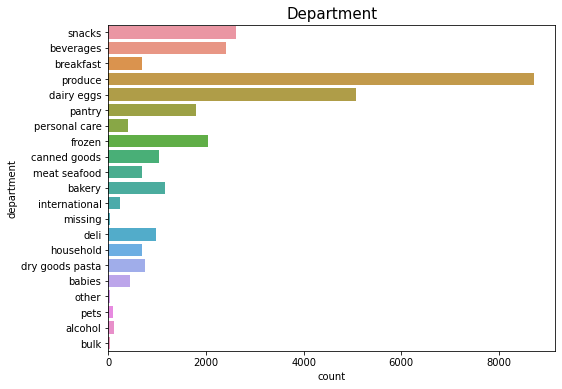

In [45]:
# 고객이 가장 많이 구매하는 제품 항목은 무엇인가? 

print(temp.department.value_counts()[:5])
plt.figure(figsize=(8,6))
plt.title('Department', fontsize=15)
sns.countplot(data=temp, y='department')
plt.show()

- 1위는 생산품(농산물) 2위는 유제품 달걀 3위는 스낵이다.

<Figure size 1440x1080 with 0 Axes>

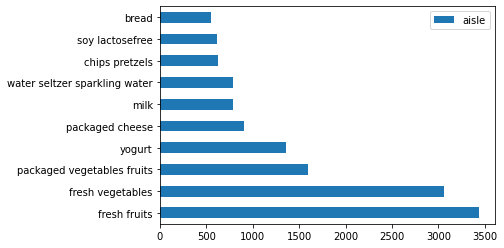

In [98]:
temp_aisle = temp.aisle.value_counts()[:10]

aisle_df = pd.DataFrame(temp_aisle)
plt.figure(figsize=(20,15))
aisle_df.plot(kind='barh')
plt.show()

- 고객이 구매빈도가 가장 높은 매대 코너는 fresh fruits 이다.

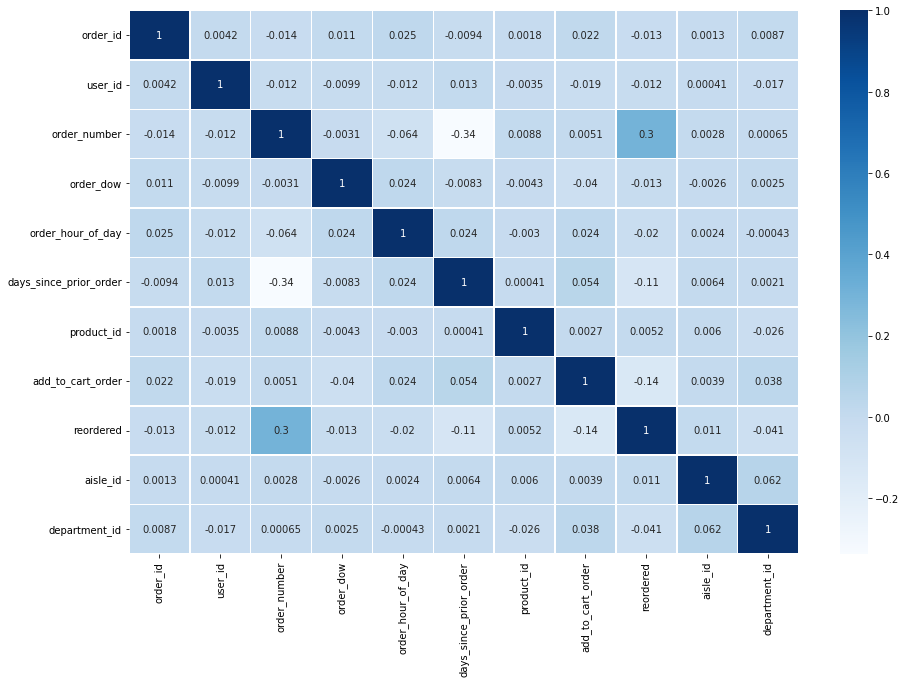

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(data=temp.corr(), annot=True, cmap='Blues', linewidths=.5 )
plt.show()

- 히트맵을 통해 유의미한 결과를 얻을 수는 없었다.

## 데이터 전처리

- 클러스터링을 위해 데이터를 변환해줘야 한다.
- 데이터를 transaction 단위로 변경합니다.
- User 단위로 어떤 물품을 구매했는지의 정보만 가지는 feature vector로 변환한다. 
e.g. __pd.crosstab__ , __CountVectorizer__
---
pd.crosstab(index, columns , value, aggfuc): 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용

In [102]:
temp.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1483,90,prior,31,3,13,5.0,32818,1,1,Organic Pink Lemonade Bunny Fruit Snacks,50,19,fruit vegetable snacks,snacks
1,2127,2985,prior,11,3,2,17.0,32773,1,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
2,2926,159694,prior,12,5,13,4.0,32773,13,0,VEGET TOMATO BASIL,50,19,fruit vegetable snacks,snacks
3,783,3671,prior,8,6,15,27.0,13350,12,1,Vine Ripened Golden Berries,50,19,fruit vegetable snacks,snacks
4,2483,4141,prior,8,5,14,30.0,26348,4,1,Mixed Fruit Fruit Snacks,50,19,fruit vegetable snacks,snacks


In [103]:
# transaction -> user_level 단위로 변경하고, User당 정보로 변환하는 과정까지 진행해보기
# 1.Department 2.aisle(v)   3. product_name
# aisle을 기준으로 클러스터링을 진행해보고자 한다.

X= pd.crosstab(index=temp.user_id, columns= temp.aisle)
X

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
150,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4. 클러스터링 모델 적용하기

- 사용하는 클러스터링 모델 KMeans

[K-Means]
- Elbow method를 이용하여 최적의 K 값 찾기
- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 하는가
- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산하보기

In [104]:
# data- setting
X

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
150,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
# tSNE : 시각화 용도의 차원감소 기법 (2차원으로 변환해주는 기법)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data =tsne.fit_transform(X)
tsne_data

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-34.6926   ,   4.840029 ],
       [  6.043974 ,  54.098526 ],
       [ 15.250013 , -29.238142 ],
       ...,
       [ -8.721662 ,  -1.7558002],
       [ 12.771801 , -10.53386  ],
       [ -0.9238211,  45.1803   ]], dtype=float32)

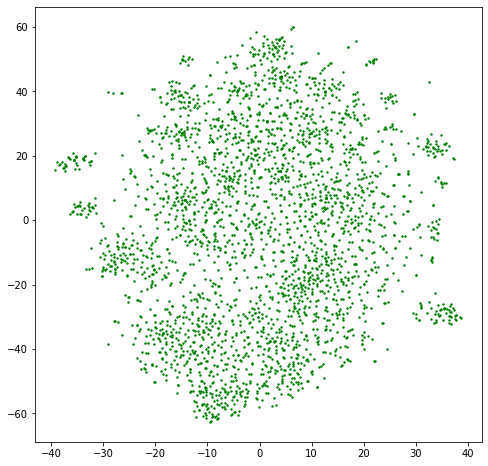

In [111]:
plt.figure(figsize=(8,8))
plt.scatter(x=tsne_data[:,0], y=tsne_data[:,1], s=2 , c='g') #s: size, c: color 
plt.show()

In [113]:
# K-means 

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

model1= KMeans(n_clusters=4)
model2= KMeans(n_clusters=2)

pred1= model1.fit_predict(X)
pred2= model2.fit_predict(X)

print('Silhouette Score1 :{}'.format(silhouette_score(X, pred1)))
print('Silhouette Score2 :{}'.format(silhouette_score(X, pred2)))


Silhouette Score1 :0.14718257441782667
Silhouette Score2 :0.2563686506539733


__Silhouette__

- 개체별로 그 적합성이 평가되는데, 클러스터의 유효성 검증시 사용된다.
- s(i) = (b(i)-a(i)) / max{a(i),b(i)}
  - a(i) = i개체와 같은 군집에 속한요소들 간 거리들의 평균
  - b(i) = i개체와 다른 군집 내 개체들 간의 거리를 군집별로 구하고, 이중 가장 작은값

- 개체별로 (가장 가까운 외부와의 거리 - 평균적인 내부와의 거리) / 외부와의 거리와 내부와의 거리 중 큰 것

- 해당 개체와 내부와의 거리가 짧을수록, 해당 개체와 외부와의 거리가 길수록 s(i)는 커짐

- 해당 개체와 내부와의 거리 > 해당 개체와 외부와의 거리 이면, 분자가 -가 됨

- 일반적으로 모든 개체의 silhouette 값이 0.5보다 크면, 클러스터링이 잘 된 것이라고 판단 됨

In [114]:
# 최적의 K 값 구하기
# Elbow method: 정해진 K에 대해서 SSE를 계산한 다음, SSE가 가장 많이 꺾이는 K(elbow)가 optimal K라고 판단하는 방법

#elbow method SSE = Sum of Squared Error(SSE)
# inertia value: 몇 개의 클러스터의 수가 가장 적절한지 나타내주는 지표. 
#군집화가 된 후에, 각 중심점에서 군집의 데이터간의 거리를 합산한 것으로 군집의 응집도를 나타내는 값. 값이 작을수록 응집도가 높게 군집화가 잘 되었다고 평가됨

sse=[]
silhouettes=[]

for K in range(2,11):
  model=KMeans(n_clusters=K)
  pred=model.fit_predict(X)
  sse.append(model.inertia_)
  silhouettes.append(silhouette_score(X, pred))


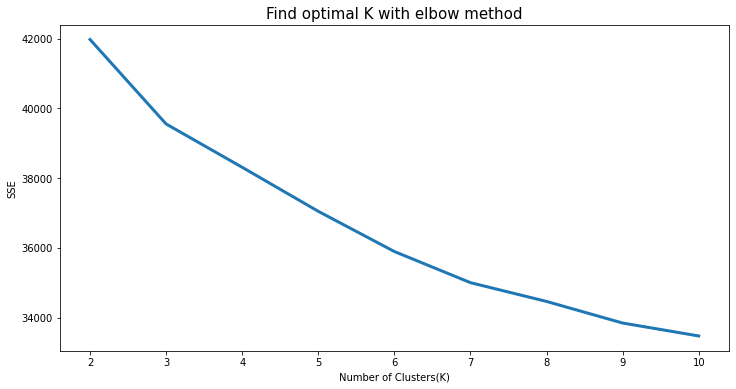

In [116]:
plt.figure(figsize=(12,6))
plt.title('Find optimal K with elbow method', fontsize=15)
plt.xlabel('Number of Clusters(K)', fontsize=10)
plt.ylabel('SSE', fontsize=10)
plt.plot(range(2,11), sse, lw=3)
plt.show()

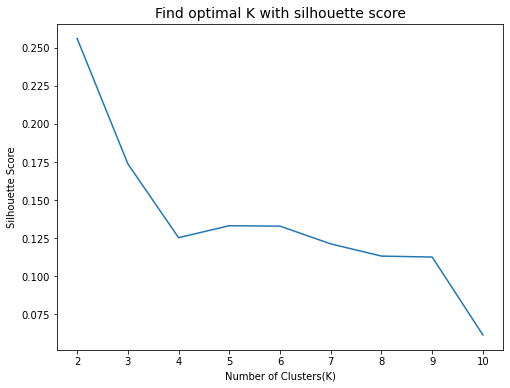

In [117]:
# Silhouette score : 같은 클러스터에 속하는 데이터중 가장 먼 데이터와의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표. [-1, 1]
# Reference : https://en.wikipedia.org/wiki/Silhouette_(clustering)

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with silhouette score", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.plot(range(2, 11), silhouettes)
plt.show()

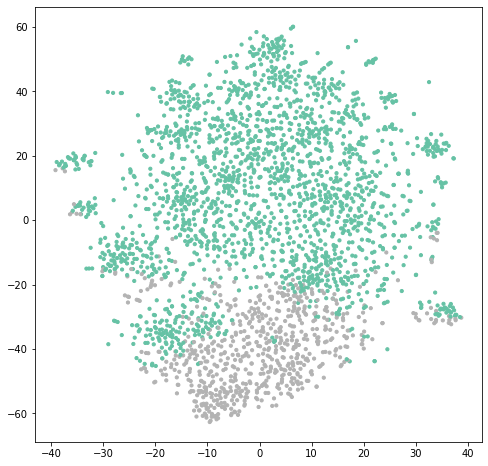

In [122]:
# 2개의 클러스터로 나누었을 경우
plt.figure(figsize=(8,8))
plt.scatter(x=tsne_data[:,0], y=tsne_data[:,1], s=10, c=pred2, cmap='Set2')
plt.show()

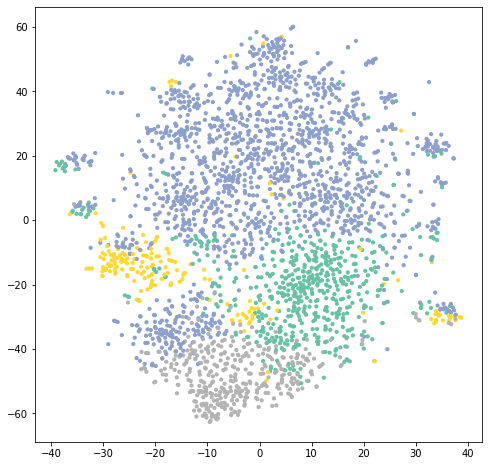

In [124]:
# 4개의 클러스터로 나누었을 경우
plt.figure(figsize=(8,8))
plt.scatter(x=tsne_data[:,0], y=tsne_data[:,1], s=10, c=pred1, cmap='Set2')
plt.show()